In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zhengqi/zhengqi_train.txt
/kaggle/input/zhengqi/zhengqi_test.txt


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")
 
%matplotlib inline

In [5]:
train_data_file = "/kaggle/input/zhengqi/zhengqi_train.txt"
test_data_file =  "/kaggle/input/zhengqi/zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')

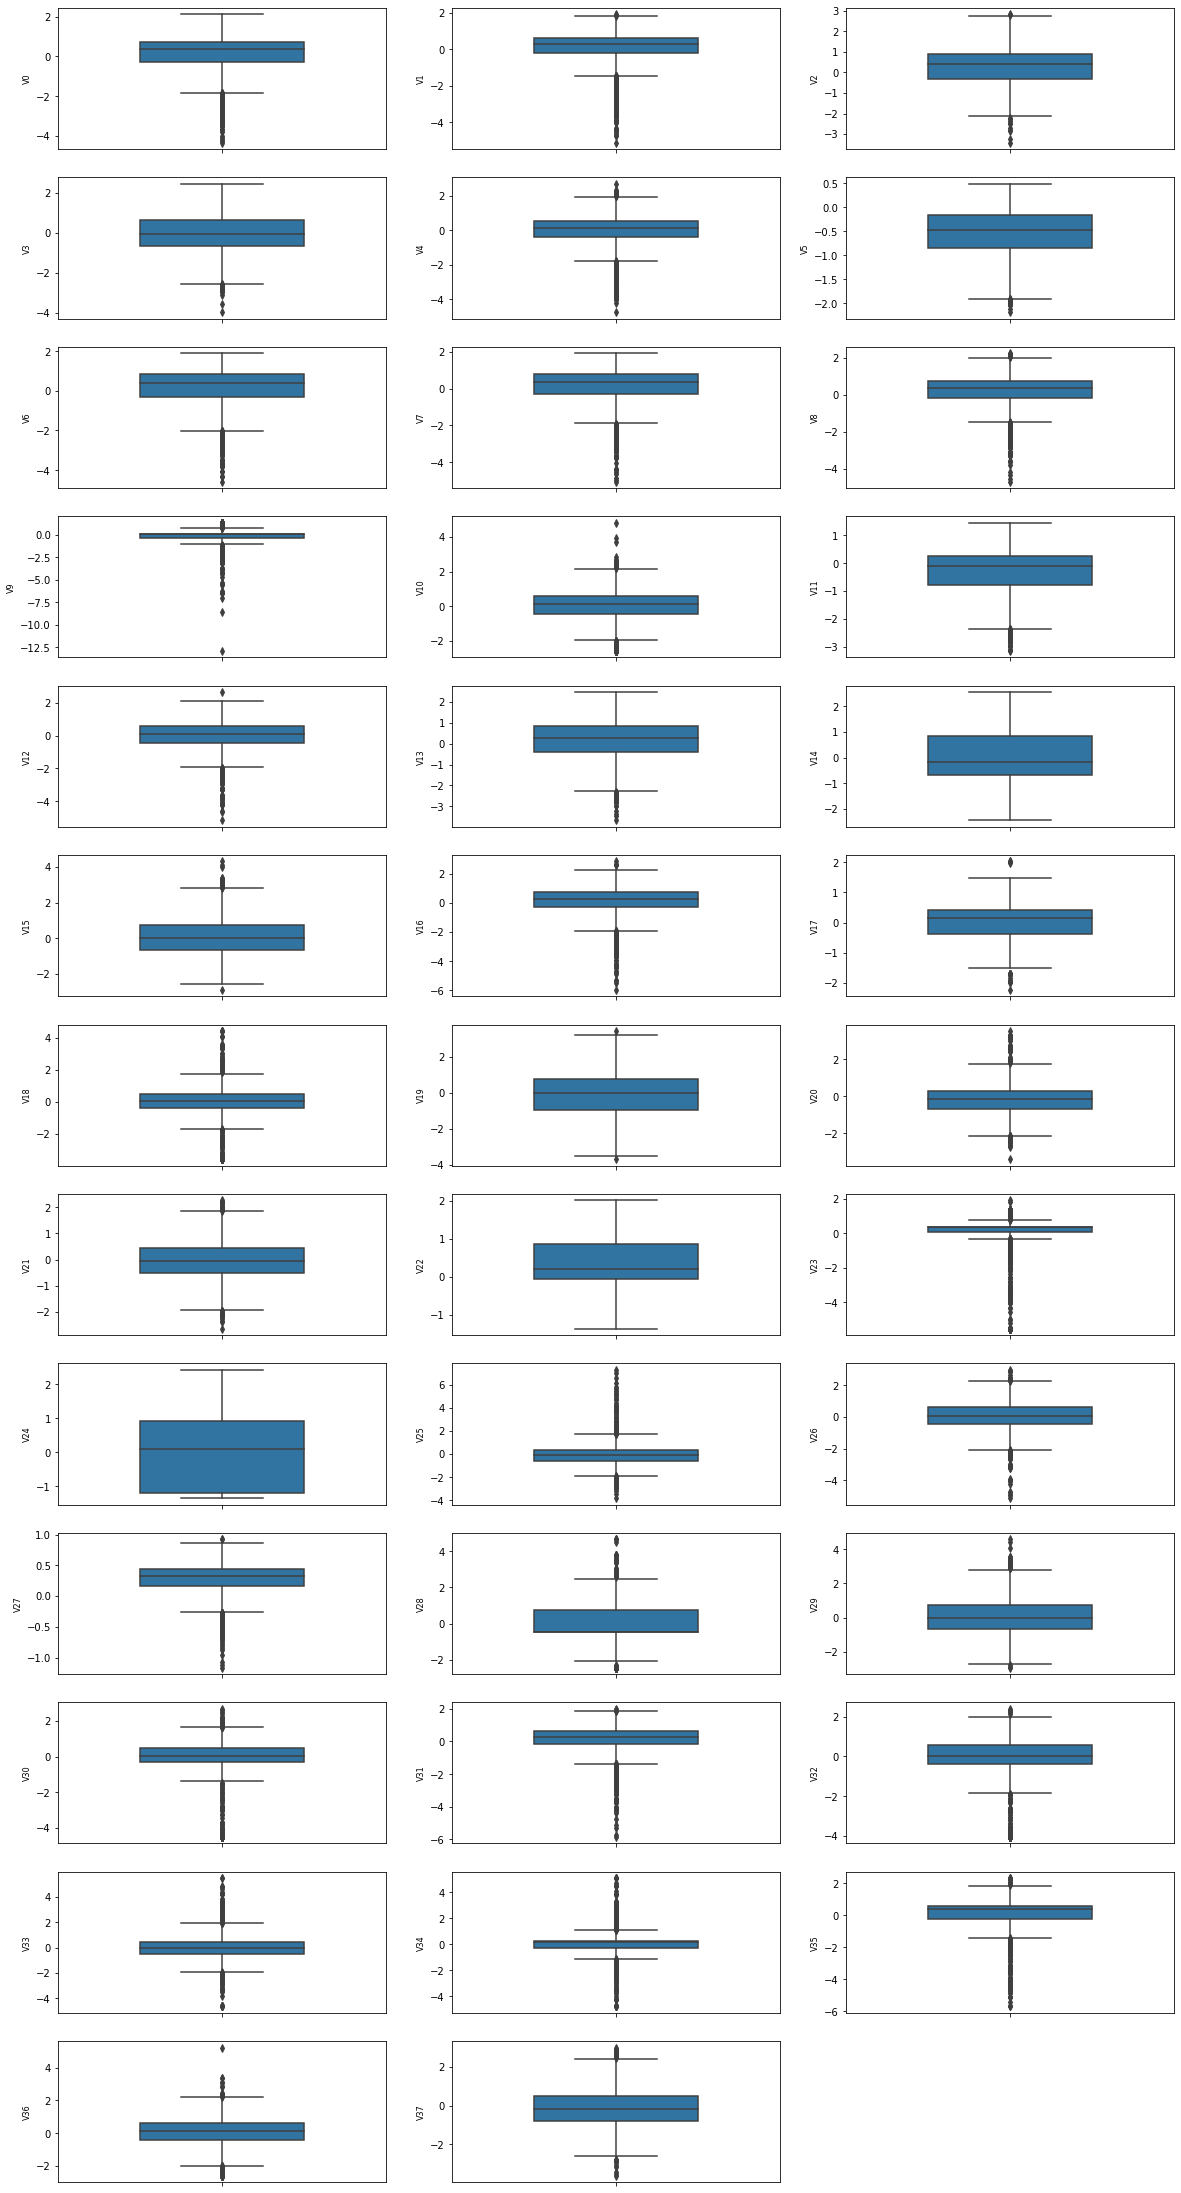

In [6]:
# 画箱式图
column = train_data.columns.tolist()[:39]  # 列表头
fig = plt.figure(figsize=(20, 40))  # 指定绘图对象宽度和高度
for i in range(38):
    plt.subplot(13, 3, i + 1)  # 13行3列子图
    sns.boxplot(train_data[column[i]], orient="v", width=0.5)  # 箱式图
    plt.ylabel(column[i], fontsize=8)
plt.show()

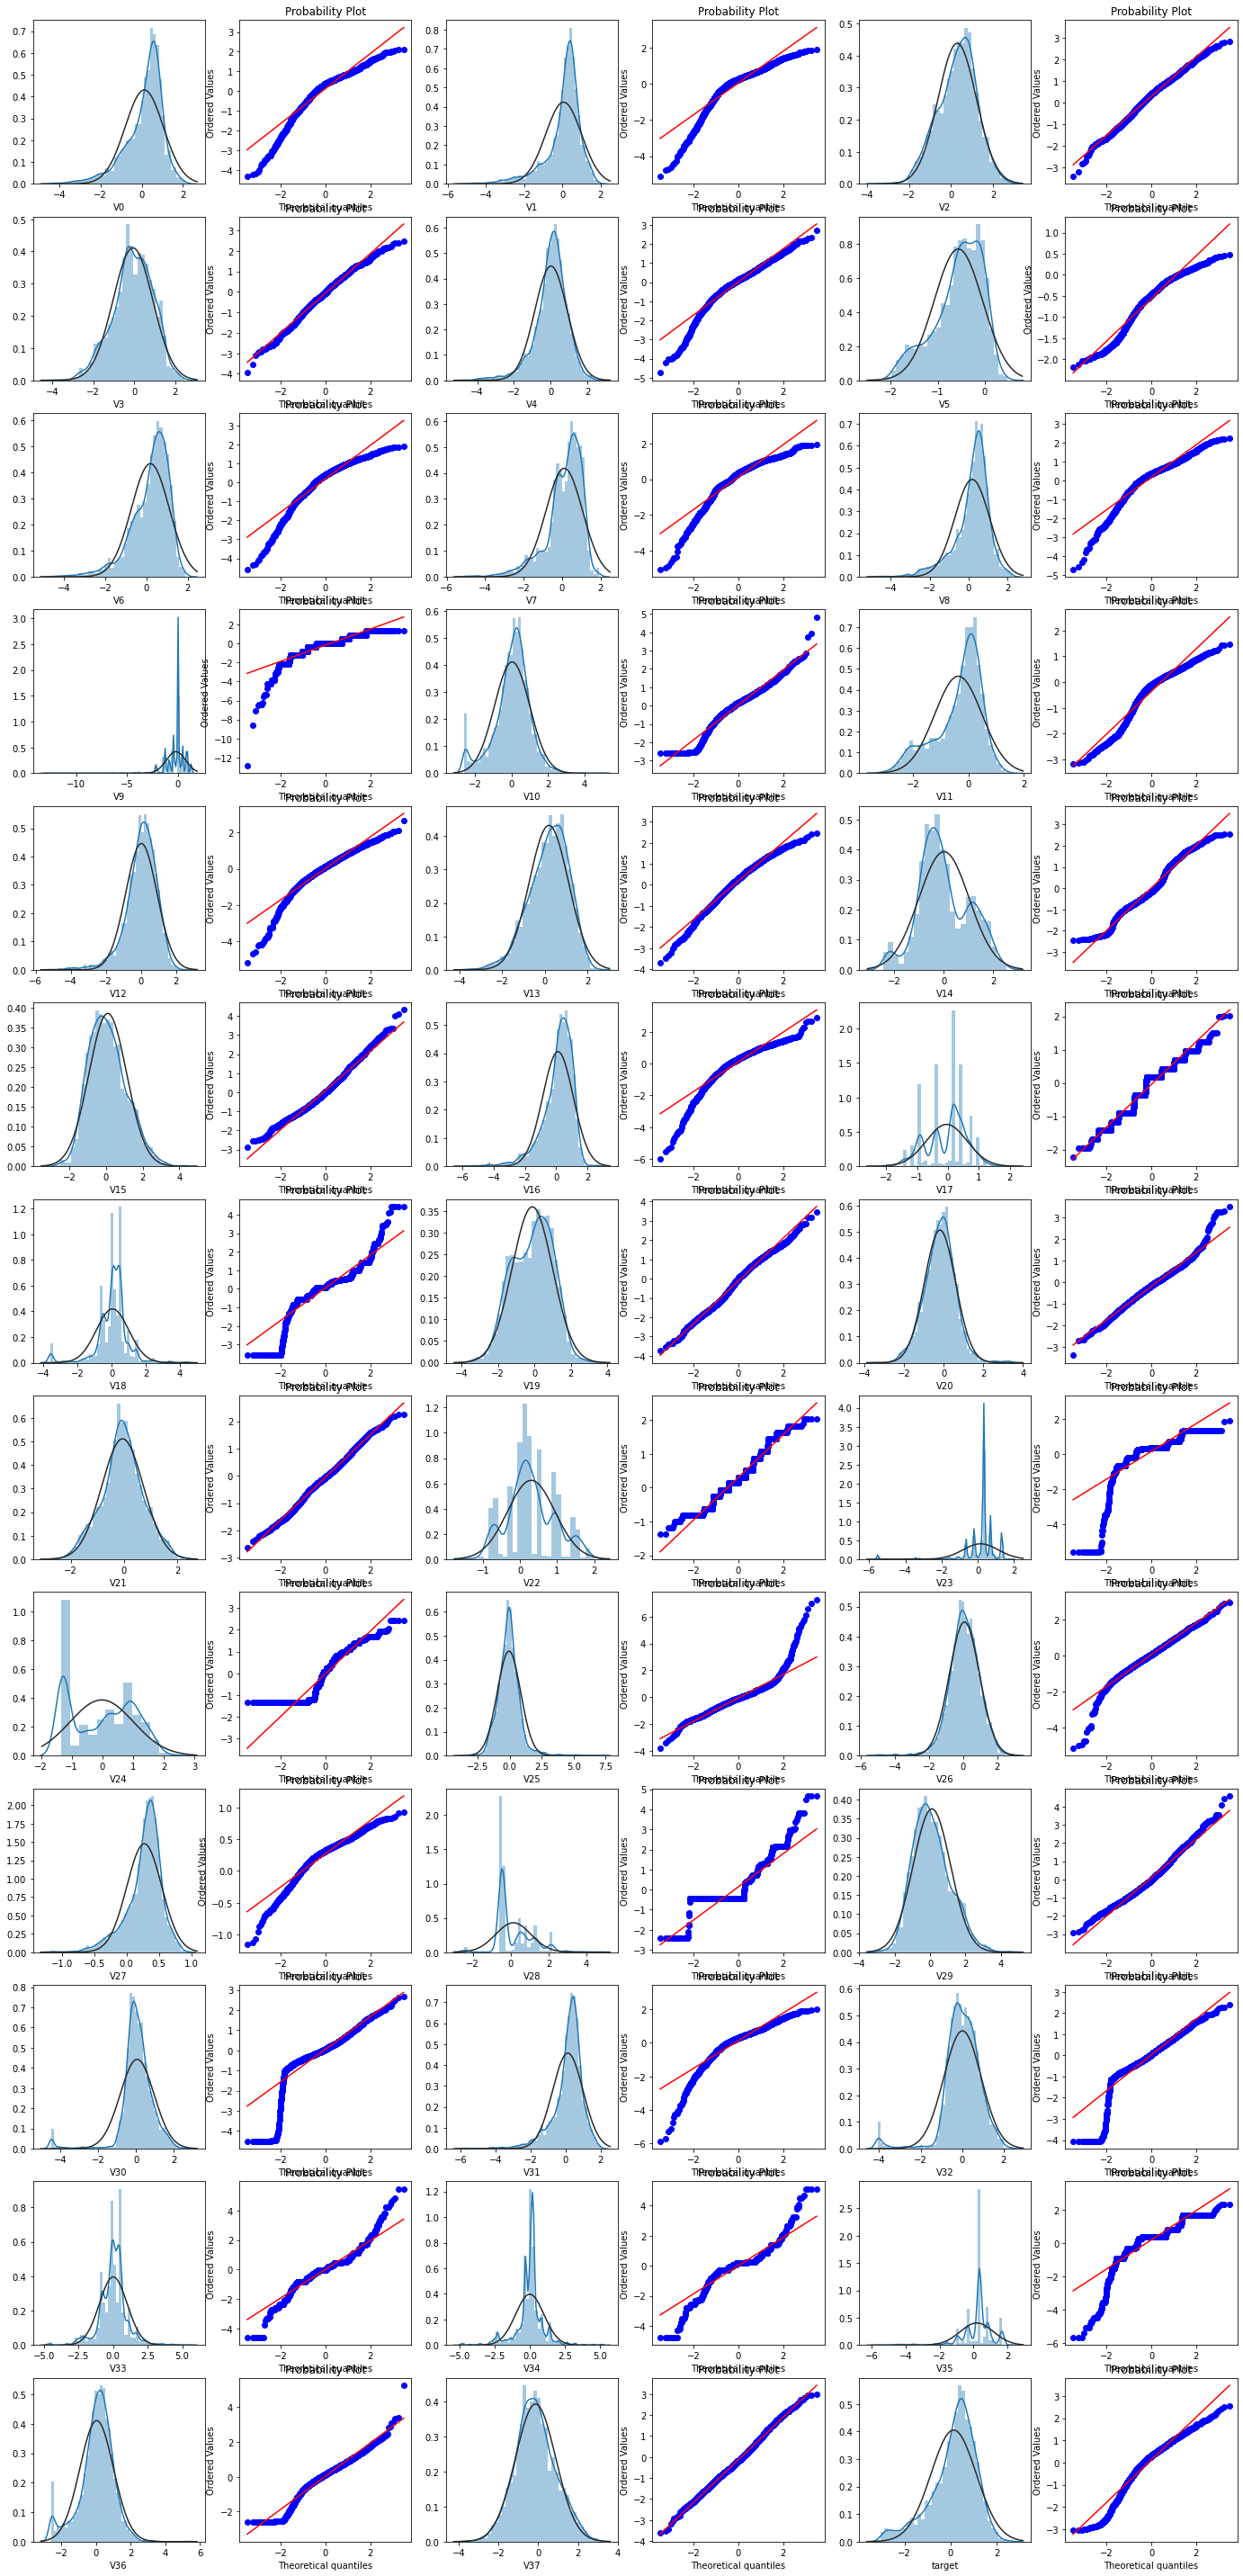

In [7]:
## q-q plot
train_cols = 6
train_rows = len(train_data.columns)
plt.figure(figsize=(4*train_cols,4*train_rows))

i=0
for col in train_data.columns:
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    sns.distplot(train_data[col],fit=stats.norm)
    
    i+=1
    ax=plt.subplot(train_rows,train_cols,i)
    res = stats.probplot(train_data[col], plot=plt)
plt.show()

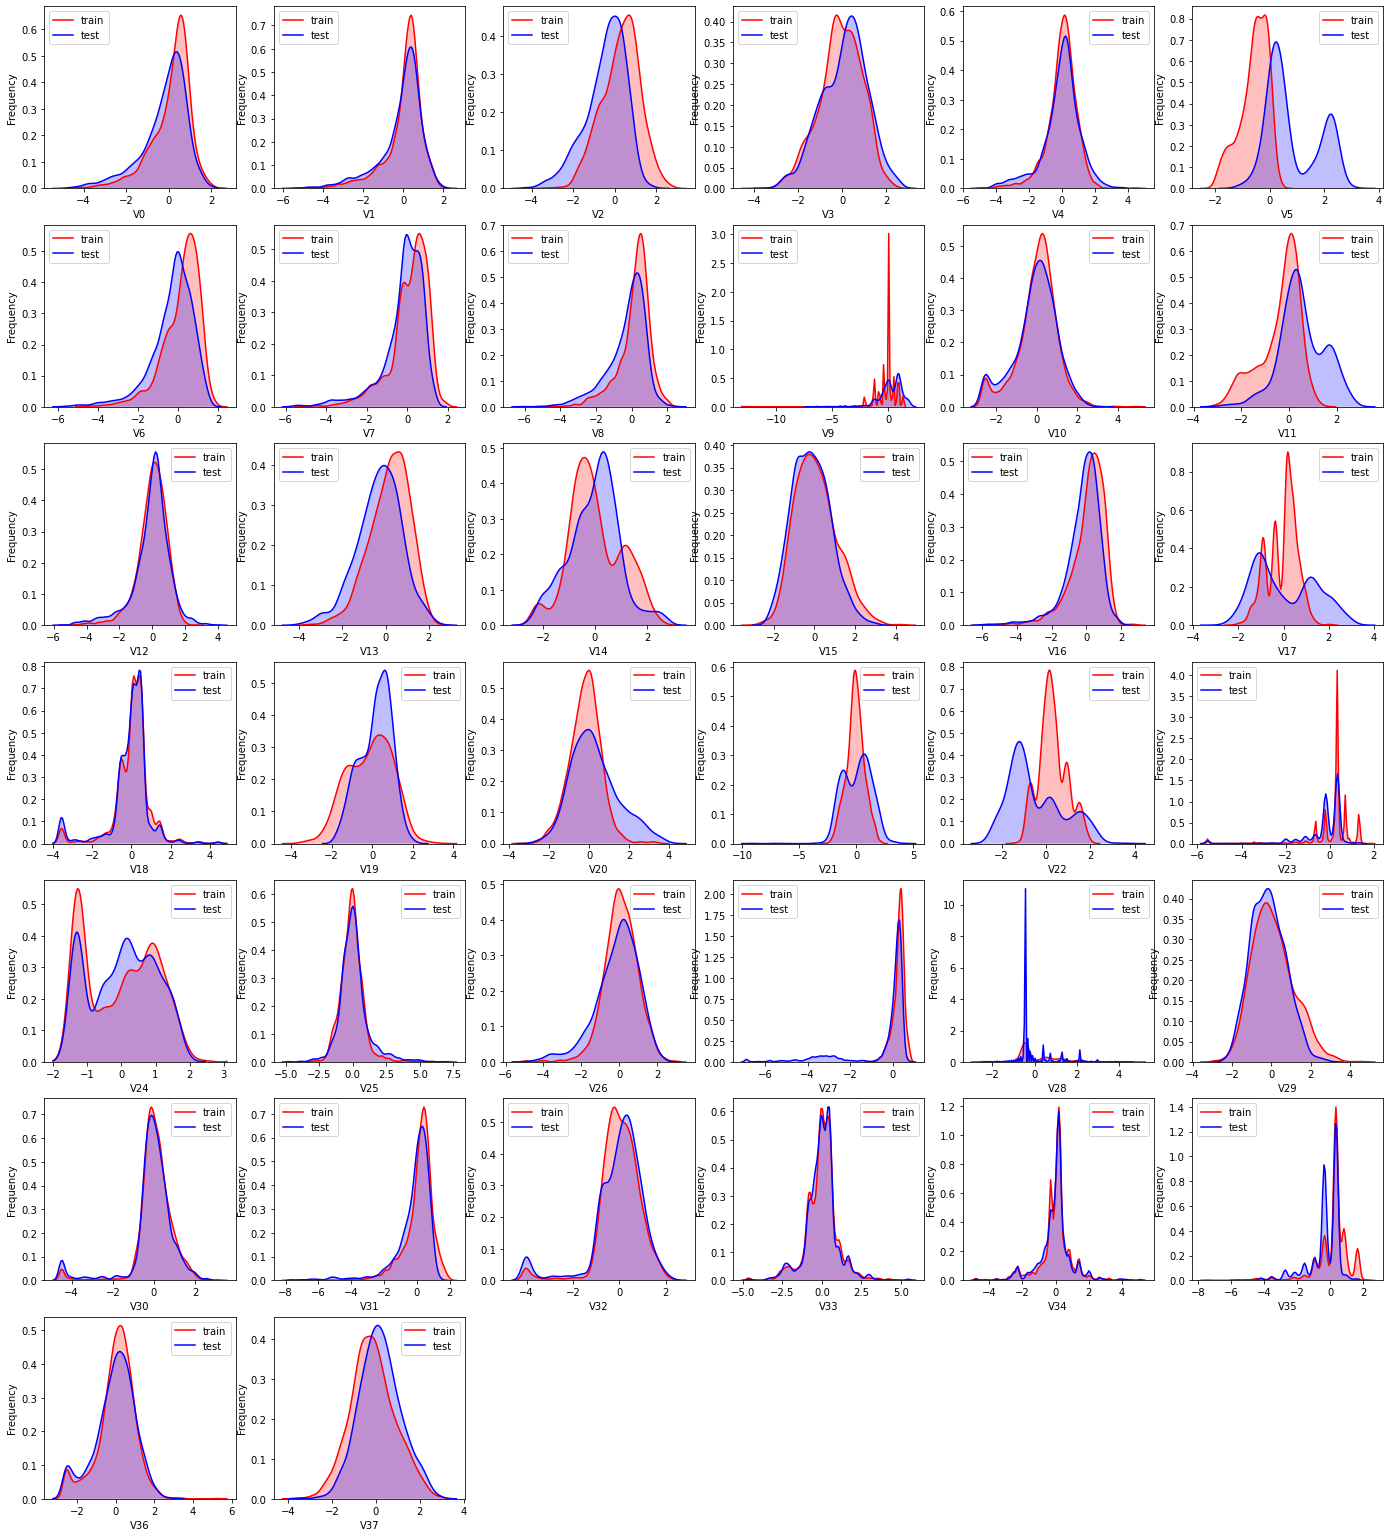

In [8]:
## 比较train test 分布

dist_cols = 6
dist_rows = len(test_data.columns)
plt.figure(figsize=(4*dist_cols,4*dist_rows))

i=1
for col in test_data.columns:
    ax=plt.subplot(dist_rows,dist_cols,i)
    ax = sns.kdeplot(train_data[col], color="Red", shade=True)
    ax = sns.kdeplot(test_data[col], color="Blue", shade=True)
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")
    ax = ax.legend(["train","test"])
    
    i+=1
plt.show()

In [ ]:
# 查看所有特征变量与'target'变量的线性回归关系

fcols = 6
frows = len(test_data.columns)
plt.figure(figsize=(5*fcols,4*frows))

i=0
for col in test_data.columns:
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.regplot(x=col, y='target', data=train_data, ax=ax, 
                scatter_kws={'marker':'.','s':3,'alpha':0.3},
                line_kws={'color':'k'});
    plt.xlabel(col)
    plt.ylabel('target')
    
    i+=1
    ax=plt.subplot(frows,fcols,i)
    sns.distplot(train_data[col].dropna())
    plt.xlabel(col)